In [1]:
import itertools
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt
from math import *
import scipy
from tqdm import tqdm
from scipy.spatial import Delaunay

from utils import *


import matplotlib as mpl

# Set the default font and size
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['font.size'] = 14

# import sparse 
import scipy.sparse as sparse
# import stats
import scipy.stats as stats

def has_zero_row_or_column(matrix):
    zero_row = np.all(matrix == 0, axis=1)
    zero_column = np.all(matrix == 0, axis=0)
    return np.any(zero_row) or np.any(zero_column)

For smart diauxers, take D = 2, 10, 100, 1000

In [3]:
# smart diauxers with D=2
N_community = 5000
logD = log(2)
data = []
for R in range(2, 7):
    N = R
    communities = []
    stabilities = []
    for i in tqdm(range(N_community)):
        community = {}
        g = generate_g(N, R)
        pref_list = smart_preference_list(g)
        dep_orders = allowed_orders(pref_list)
        N_dep_order = len(dep_orders)
        community["g"], community["pref_list"] = g, pref_list
        community["N_dep_orders"] = N_dep_order # allowed number of depletion orders, regardless of growth rates
        community["allowed_orders"] = dep_orders
        community["possible_orders"] = []
        for j in range(N_dep_order):
            dep_order = dep_orders[j]
            G = G_mat(g, pref_list, dep_order, N, R)
            if(np.linalg.matrix_rank(G)>=N):
                t = np.linalg.inv(G)@np.ones(R)*logD
                if(sum(t>0) >= len(t)):
                    community["possible_orders"].append(dep_order)
        communities.append(community)
    data.append({"R":R, "logD":logD, "communities":communities})
filename = "smartdiauxer_D=2_heatmap_diagonal.pkl"
pickle.dump(data, open(filename, "wb"))

# smart diauxers with D=10
N_community = 5000
logD = log(10)
data = []
for R in range(2, 7):
    N = R
    communities = []
    stabilities = []
    for i in tqdm(range(N_community)):
        community = {}
        g = generate_g(N, R)
        pref_list = smart_preference_list(g)
        dep_orders = allowed_orders(pref_list)
        N_dep_order = len(dep_orders)
        community["g"], community["pref_list"] = g, pref_list
        community["N_dep_orders"] = N_dep_order # allowed number of depletion orders, regardless of growth rates
        community["allowed_orders"] = dep_orders
        community["possible_orders"] = []
        for j in range(N_dep_order):
            dep_order = dep_orders[j]
            G = G_mat(g, pref_list, dep_order, N, R)
            if(np.linalg.matrix_rank(G)>=N):
                t = np.linalg.inv(G)@np.ones(R)*logD
                if(sum(t>0) >= len(t)):
                    community["possible_orders"].append(dep_order)
        communities.append(community)
    data.append({"R":R, "logD":logD, "communities":communities})
filename = "smartdiauxer_D=10_heatmap_diagonal.pkl"
pickle.dump(data, open(filename, "wb"))

# smart diauxers with D=1000
N_community = 5000
logD = log(1000)
data = []
for R in range(2, 7):
    N = R
    communities = []
    stabilities = []
    for i in tqdm(range(N_community)):
        community = {}
        g = generate_g(N, R)
        pref_list = smart_preference_list(g)
        dep_orders = allowed_orders(pref_list)
        N_dep_order = len(dep_orders)
        community["g"], community["pref_list"] = g, pref_list
        community["N_dep_orders"] = N_dep_order # allowed number of depletion orders, regardless of growth rates
        community["allowed_orders"] = dep_orders
        community["possible_orders"] = []
        for j in range(N_dep_order):
            dep_order = dep_orders[j]
            G = G_mat(g, pref_list, dep_order, N, R)
            if(np.linalg.matrix_rank(G)>=N):
                t = np.linalg.inv(G)@np.ones(R)*logD
                if(sum(t>0) >= len(t)):
                    community["possible_orders"].append(dep_order)
        communities.append(community)
    data.append({"R":R, "logD":logD, "communities":communities})
filename = "smartdiauxer_D=1000_heatmap_diagonal.pkl"
pickle.dump(data, open(filename, "wb"))

100%|██████████| 5000/5000 [03:25<00:00, 24.30it/s]


In [6]:
#To replot this thing, using only the communities from the original community of smart diauxers:
data = {}
N_community = 20000

keys = ["D=2", "D=10", "D=100", "D=1000"]
Ds = [2, 10, 100, 1000]
for D_idx, D in enumerate(Ds):
    data[keys[D_idx]] = [[], []]
    logD=log(D)
    for R in range(2, 7):
        N = R
        filename = "smart_heatmap_diagonal.pkl"
        data_sub = pickle.load(open(filename, "rb"))
        communities = []
        stabilities = []
        stable = 0
        for item in data_sub:
            if(item["R"]==R):
                communities = item["communities"]
                break
        for item in communities:
            if(item["possible_dep_order"]!=[]):
                for dep_order in item["possible_dep_order"]:
                    g, pref_list = item["g"], item["pref_list"]
                    F = F_mat(g, pref_list, dep_order, logD, N, R)
                    G = G_mat(g, pref_list, dep_order, N, R)
                    t = np.linalg.inv(G)@np.ones(R)*logD
                    env = {"N":N, "R":R, "logD":logD}
                    if(np.abs(np.max(np.real(np.linalg.eigvals(Pert_mat(g, dep_order, G, t, F, env))))) < 1+1e-9):
                    # if(1):
                        stabilities.append( (log(np.abs(np.linalg.det(F))/(exp(logD)-1)**R)/log(10))/(R-1) )
                        stable += 1
                        break
        success_rate = stable/N_community
        stability = np.mean(stabilities)
        err = np.std(stabilities)/sqrt(len(stabilities))
        data[keys[D_idx]][0].append(success_rate)
        data[keys[D_idx]][1].append([stability, err])
        print(stability, success_rate)

-0.7157783558484008 0.5016
-0.6795904631293969 0.2346
-0.6572319246374221 0.1139
-0.6458740452601569 0.05085
-0.6413226465195809 0.02395
-0.8506210781584232 0.5016
-0.8236769261585085 0.23475
-0.8074106500682892 0.1144
-0.8014219904323545 0.05135
-0.7965265960165606 0.0241
-1.1245473889076534 0.5016
-1.1167522311233335 0.2353
-1.1067806490585712 0.1151
-1.1069430833131384 0.0515
-1.1057871720314616 0.0243
-1.4522017903897644 0.5016
-1.4645954117244833 0.23585
-1.459610256669802 0.11535
-1.4702105847955547 0.05185
-1.4755374206475762 0.0246


[0.0013875234866412602, -0.027612000892527164, -0.04038628892895605, -0.08958906008531183, -0.11554450392951202] [-0.7157783558484008, -0.6795904631293969, -0.6572319246374221, -0.6458740452601569, -0.6413226465195809]
[0.0013875234866412602, -0.027334407733889104, -0.038483988551051014, -0.08533956941077822, -0.11283297910522565] [-0.8506210781584232, -0.8236769261585085, -0.8074106500682892, -0.8014219904323545, -0.7965265960165606]
[0.0013875234866412602, -0.02631808149601631, -0.03583468937826464, -0.08407278830288423, -0.10924374808178186] [-1.1245473889076534, -1.1167522311233335, -1.1067806490585712, -1.1069430833131384, -1.1057871720314616]
[0.0013875234866412602, -0.025304128090316968, -0.03489241415094416, -0.08113125661901545, -0.1039149145767149] [-1.4522017903897644, -1.4645954117244833, -1.459610256669802, -1.4702105847955547, -1.4755374206475762]


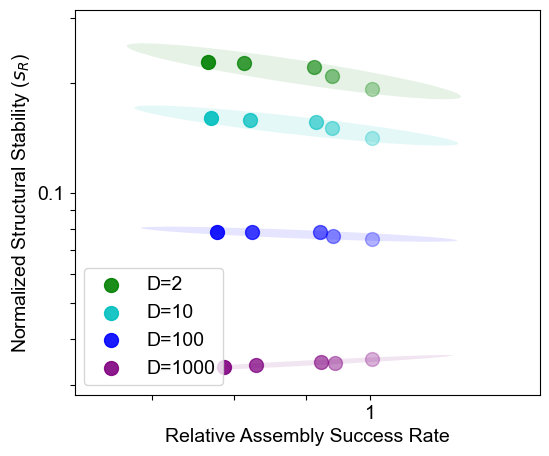

In [9]:
from matplotlib.patches import Ellipse
import matplotlib as mpl

alpha_list = np.arange(0.3, 1, 0.15)

color_list = ["g", "c", "b", "purple"]
keys_list = ["D=2", "D=10", "D=100", "D=1000"]
legend_list = ["D=2", "D=10", "D=100", "D=1000"]

plt.rcParams["figure.figsize"] = [6, 5]
fig, ax1 = plt.subplots()

for k_ind, k in enumerate(keys_list):
    for i in range(4):
        normalized_assembly = log10(data[k][0][i]*(2**(i+1)))
        stability = data[k][1][i][0]
        err = data[k][1][i][1]
        ax1.scatter(normalized_assembly, stability, marker='o', 
                     s= 100, alpha = alpha_list[i], color=color_list[k_ind])
    for i in range(4, 5):
        normalized_assembly = log10(data[k][0][i]*(2**(i+1)))
        stability = data[k][1][i][0]
        err = data[k][1][i][1]
        ax1.scatter(normalized_assembly, stability, marker='o', 
                    s=100, alpha = alpha_list[i], color=color_list[k_ind], label=legend_list[k_ind])

for i, key in enumerate(keys_list):
    x_group, y_group = [log10(i*(2**(index+1))) for index, i in enumerate(data[key][0])], [i[0] for i in data[key][1]]
    print(x_group, y_group)
    center = np.mean([x_group, y_group], axis=1)
    cov_matrix = np.cov(x_group, y_group)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    angle = np.degrees(np.arctan2(*eigenvectors[:, 0][::-1]))
    width, height = 5*np.sqrt(eigenvalues)
    ellipse = Ellipse(center, width, height, angle=angle, facecolor=color_list[i], alpha=0.1)
    ax1.add_patch(ellipse)

xlo, xhi, ylo, yhi = -0.21, 0.12, -1.55, -0.5
ax1.set_xlim(xlo, xhi)
ax1.set_ylim(ylo, yhi)
a, b = ticking(xlo, xhi)
ax1.set_xticks(a, b)
a, b = ticking(ylo, yhi)
ax1.set_yticks(a, b)
ax1.legend()
ax1.set_xlabel("Relative Assembly Success Rate")
ax1.set_ylabel("Normalized Structural Stability ($s_R$)")
plt.savefig("figures/supp_depend_on_D.pdf", bbox_inches="tight")

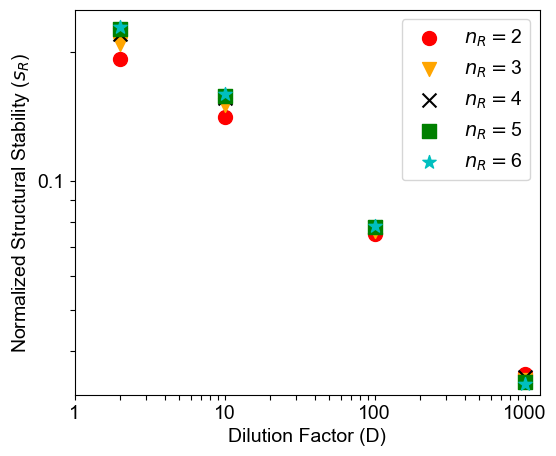

In [15]:
# plot the y axis and logD only
markerlist = ['o', 'v', 'x', 's', "*"]
colorlist = ['r', 'orange', 'k', 'g', 'c']
Dlist = [2, 10, 100, 1000]
nRlist = range(2, 7)
for idx, nR in enumerate(nRlist):
    plt.scatter([log10(i) for i in Dlist], [data[f'D={i}'][1][idx][0] for i in Dlist], color=colorlist[idx], marker=markerlist[idx], 
                s=100,label=f"$n_R=${nR}")
xlo, xhi, ylo, yhi = 0, 3.1, -1.5, -0.6
plt.xlim(xlo, xhi)
plt.ylim(ylo, yhi)
a, b = ticking(xlo, xhi)
plt.xticks(a, b)
a, b = ticking(ylo, yhi)
plt.yticks(a, b)
plt.legend()
plt.xlabel("Dilution Factor (D)")
plt.ylabel("Normalized Structural Stability ($s_R$)")
plt.savefig("figures/supp_depend_on_D_1.pdf", bbox_inches="tight")

PearsonRResult(statistic=-0.9822058598693455, pvalue=1.5926254893139545e-14)


Text(0.5, 1.0, 'p-value=1.5926254893139545e-14')

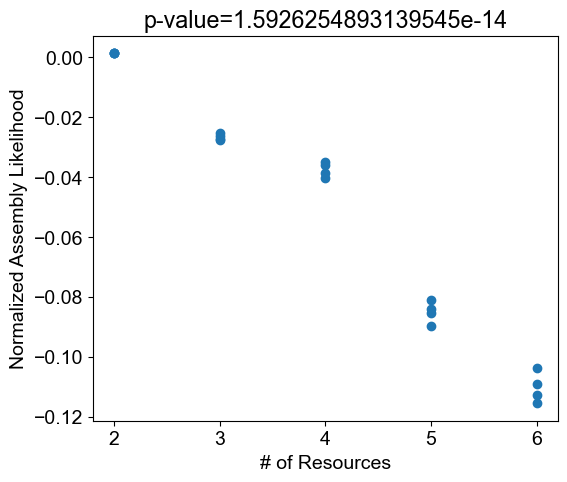

In [48]:
# p-value for assembly likelihood changing with N_R
x = []
y = []
for key in data.keys():
    x.extend([2, 3, 4, 5, 6])
    y.extend( [log10(i*(2**(index+1))) for index, i in enumerate(data[key][0])] )
print(scipy.stats.pearsonr(x, y))

plt.scatter(x, y)
plt.xlabel("# of Resources")
plt.ylabel("Normalized Assembly Likelihood")
plt.title(f"p-value={scipy.stats.pearsonr(x, y)[1]}")

In [54]:
# check if the slope has a trend
slopes = []
for i, key in enumerate(data.keys()):
    x_group, y_group = [log10(i*(2**(index+1))) for index, i in enumerate(data[key][0])], [i[0] for i in data[key][1]]
    slopes.append(scipy.stats.linregress(x_group, y_group)[0])

scipy.stats.spearmanr(range(4), slopes)

SpearmanrResult(correlation=1.0, pvalue=0.0)